<div style="text-align: center;">
  <h1>Cybersecurity Data Analysis</h1>
</div>

## Contexte
La cybersécurité est devenue un enjeu majeur dans un monde de plus en plus connecté.<br> 
Les incidents de cybersécurité peuvent avoir des impacts graves sur les entreprises, allant de la perte de données à des violations massives de confidentialité. 

## Source des Données
Ce dataset est disponible sur le dépôt GitHub : https://github.com/incribo-inc/cybersecurity_attacks.<br>  
Il recense divers incidents de cybersécurité en fournissant des informations détaillées sur le trafic réseau, les actions prises, et le contexte associé.<br> 
Les données concernent principalement des incidents observés en Inde, offrant ainsi un aperçu des vulnérabilités spécifiques à cette région.

## Description des Données
Le fichier contient 25 colonnes et un total de 40000 lignes. Ces données permettent de mieux comprendre les schémas des attaques, les segments vulnérables et les réponses associées.

### Variables Principales et Leur Signification
- **Timestamp** : Horodatage de l'événement, indiquant quand l'incident a eu lieu.
- **Source IP Address** et **Destination IP Address** : Adresses IP de la source et de la destination impliquées dans le trafic.
- **Source Port** et **Destination Port** : Ports réseau utilisés par la source et la destination.
- **Protocol** : Protocole de communication (ex : ICMP, UDP, TCP).
- **Packet Length** : Taille des paquets transmis, mesurée en octets.
- **Packet Type** : Type de paquet (données ou contrôle).
- **Traffic Type** : Type de trafic (HTTP, DNS, etc.).
- **Severity Level** : Niveau de gravité de l'incident (Low, Medium, High, etc.).
- **Geo-location Data** : Localisation géographique associée à l'incident.
- **Action Taken** : Action entreprise pour répondre à l'incident (ex : Bloqué, Ignoré, etc.).
- **User Information** et **Device Information** : Informations sur l'utilisateur et le périphérique impliqués.
- **Network Segment** : Segment réseau où l'incident a été enregistré.
- **IDS/IPS Alerts** : Alertes issues de systèmes de détection et de prévention des intrusions.

Détails des questions et axes d'analyse :

- Quelles sont les caractéristiques techniques et géographiques des attaques (types de trafic, protocoles, segments réseau vulnérables) et leurs corrélations avec la gravité ?
- Quels comportements et tendances temporelles révèlent ces attaques (exploitation de privilèges, requêtes réseau, périodicité), et comment influencent-ils leur succès ou gravité ?
- Quelles mesures de sécurité ont été mises en œuvre et quelle est leur efficacité face aux attaques identifiées ?

<b>En synthétisant ces informations, l'analyse visera à identifier des schémas récurrents, explorer des distributions statistiques, et fournir des insights pour améliorer les stratégies de détection et de réponse.<br> 
Cette exploration aidera également à mettre en évidence les segments les plus vulnérables et à formuler des recommandations spécifiques pour renforcer la cybersécurité globale.
</b>

In [121]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re


## Data Loading

In [122]:
path="../data/raw/cybersecurity_attacks.csv"
data= pd.read_csv(path)
data.head

<bound method NDFrame.head of                  Timestamp Source IP Address Destination IP Address  \
0      2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1      2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                    ...               ...                    ...   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     

## Data Exploration

----------------------

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

### Description du jeu de données

Ce dataset comprend **25 variables** réparties en :

#### Variables catégorielles (17) :
- `Timestamp` (format objet)
- `Source IP Address`
- `Destination IP Address` 
- `Protocol`
- `Packet Type`
- `Traffic Type`
- `Payload Data`
- `Malware Indicators` (50% de valeurs manquantes)
- `Alerts/Warnings` (~50% manquants)
- `Attack Type`
- `Attack Signature`
- `Action Taken`
- `Severity Level` 
- `User Information`
- `Device Information`
- `Network Segment`
- `Geo-location Data`
- `Proxy Information` (~50% manquants)
- `Firewall Logs` (~50% manquants)
- `IDS/IPS Alerts` (~50% manquants)
- `Log Source`

#### Variables numériques (4) :
- `Source Port` (int64)
- `Destination Port` (int64) 
- `Packet Length` (int64)
- `Anomaly Scores` (float64)
---

In [124]:
print("Missing data :")
data.isnull().sum().sort_values(ascending=False)

Missing data :


Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Source IP Address             0
Destination IP Address        0
Source Port                   0
Timestamp                     0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Attack Type                   0
Payload Data                  0
Anomaly Scores                0
Severity Level                0
Action Taken                  0
Attack Signature              0
User Information              0
Geo-location Data             0
Network Segment               0
Device Information            0
Log Source                    0
dtype: int64

## Data Preparation

+ Suppression de la colonne "Payload Data" :<br>
 Ce champ ne semblait pas nécessaire pour l'analyse, donc on l'a éliminé pour alléger le jeu de données et éviter les confusions.<br>
+ Remplacement des valeurs manquantes :<br>
. "Alerts/Warnings" → "Alert Not Triggered" (précise qu'aucune alerte n'a été déclenchée).<br>
. "Firewall Logs" → "No Data" (indique l'absence d'enregistrements).<br>
. "Proxy Information" → "No Data" (standardise les données manquantes).<br>
. "IDS/IPS Alerts" → "No Data" (évite les valeurs vides).<br>
. "Malware Indicators" → "Unknown" (indique une absence ou une incertitude sur les indicateurs de malware).<br>

In [125]:
cleaned_data=data.drop("Payload Data",axis=1)
cleaned_data["Alerts/Warnings"] = cleaned_data["Alerts/Warnings"].fillna("Alert Not Triggered")
cleaned_data["Firewall Logs"] = cleaned_data["Firewall Logs"].fillna("No Data")
cleaned_data["Proxy Information"] = cleaned_data["Proxy Information"].fillna("No Data")
cleaned_data["IDS/IPS Alerts"] = cleaned_data["IDS/IPS Alerts"].fillna("No Data")
cleaned_data["Malware Indicators"] = cleaned_data["Malware Indicators"].fillna("Unknown")
cleaned_data.isnull().sum().sort_values(ascending=False)


Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [126]:
cleaned_data['Browser'] = cleaned_data['Device Information'].str.split('/').str[0]


In [127]:

platform = r'(Windows|Linux|Android|iPad|iPod|iPhone|Macintosh)'
cleaned_data['Platform'] = cleaned_data['Device Information'].str.extract(platform, flags=re.I).fillna('Unknown')
cleaned_data = cleaned_data.drop('Device Information', axis = 1)

In [128]:
# Extract time features
cleaned_data["Timestamp"] = pd.to_datetime(cleaned_data["Timestamp"], errors='coerce')
cleaned_data['Year'] = cleaned_data["Timestamp"].dt.year
cleaned_data['Month'] = cleaned_data["Timestamp"].dt.month
cleaned_data['Day'] = cleaned_data["Timestamp"].dt.day
cleaned_data['Hour'] = cleaned_data["Timestamp"].dt.hour
cleaned_data['Minute'] = cleaned_data["Timestamp"].dt.minute
cleaned_data['Second'] = cleaned_data["Timestamp"].dt.second
cleaned_data['DayOfWeek'] = cleaned_data["Timestamp"].dt.dayofweek

In [129]:
new_path="../data/processed/processed_cybersecurity_attacks.csv"
cleaned_data.to_csv(new_path)

---

## Univariate Descriptive Analysis


--------------------------------------------------
Variable : Protocol
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64


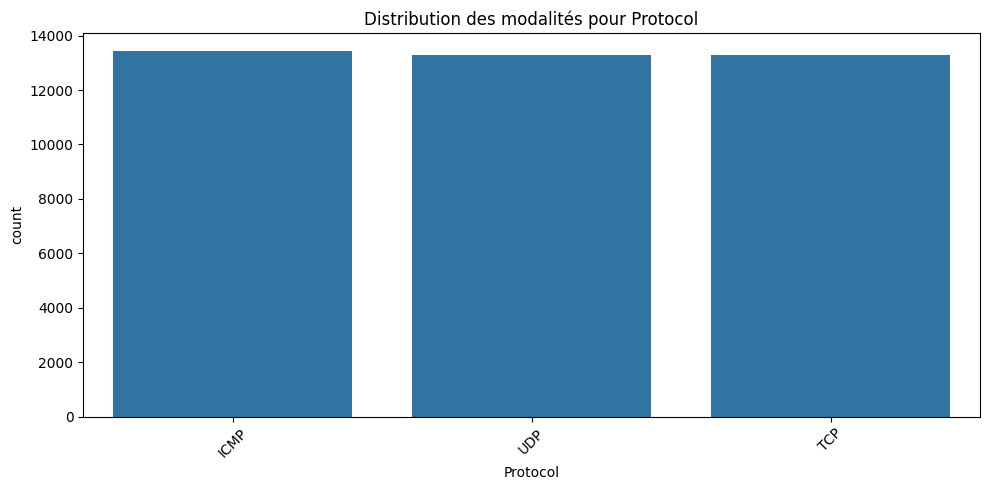


--------------------------------------------------
Variable : Packet Type
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Packet Type
Control    20237
Data       19763
Name: count, dtype: int64


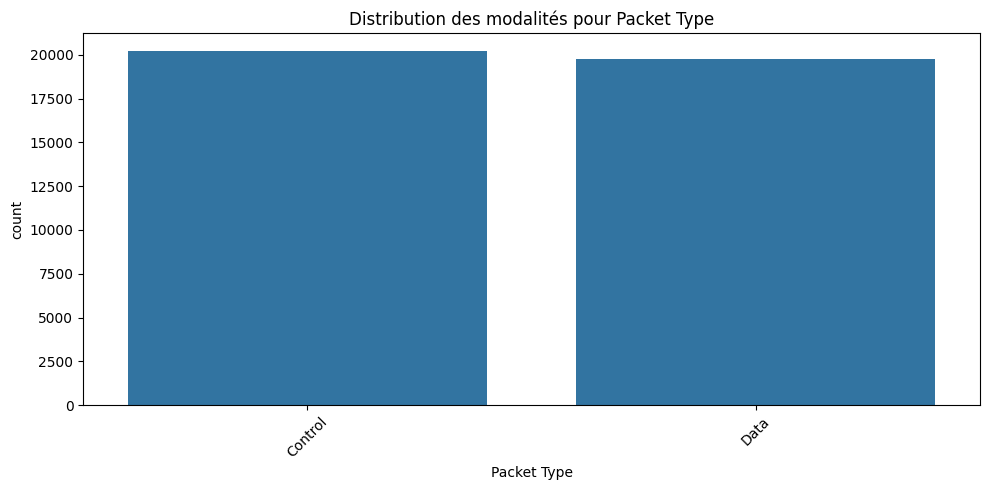


--------------------------------------------------
Variable : Traffic Type
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64


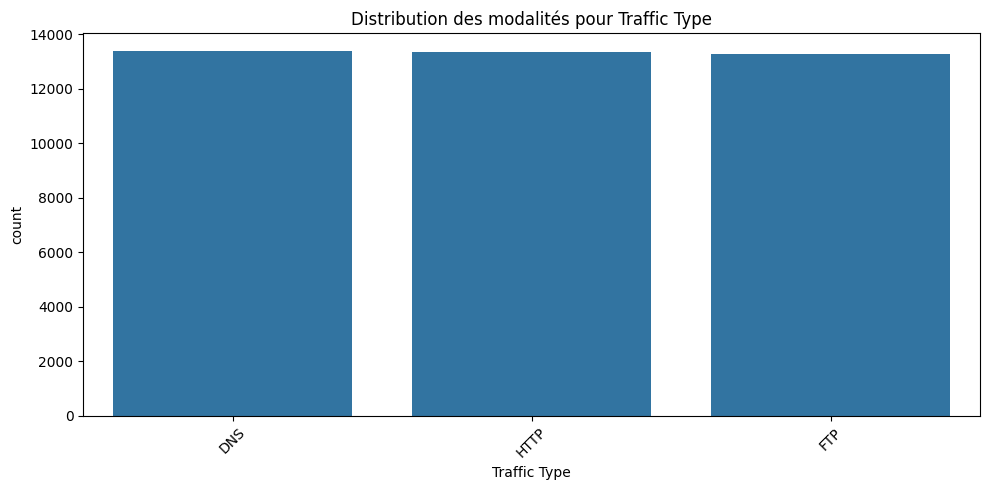


--------------------------------------------------
Variable : Malware Indicators
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Malware Indicators
IoC Detected    20000
Unknown         20000
Name: count, dtype: int64


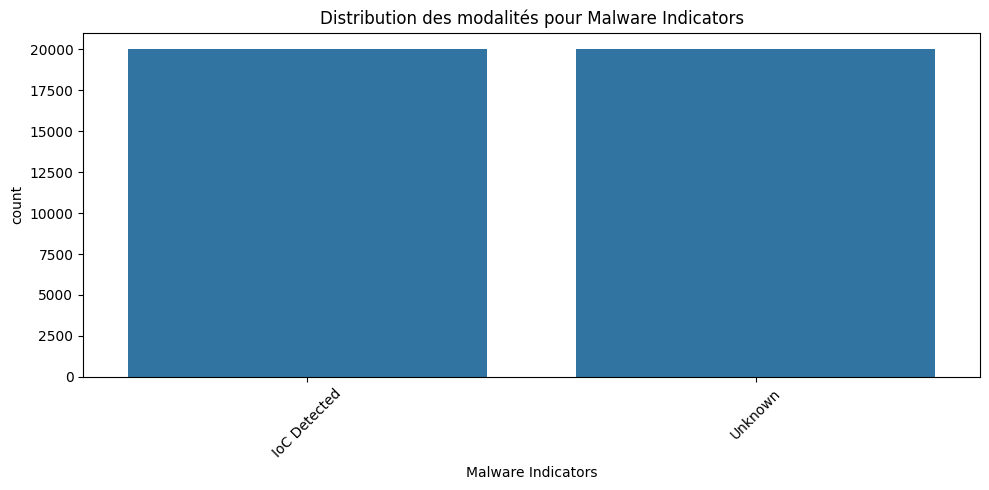


--------------------------------------------------
Variable : Platform
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 7
Top 10 des modalités les plus fréquentes :
Platform
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64


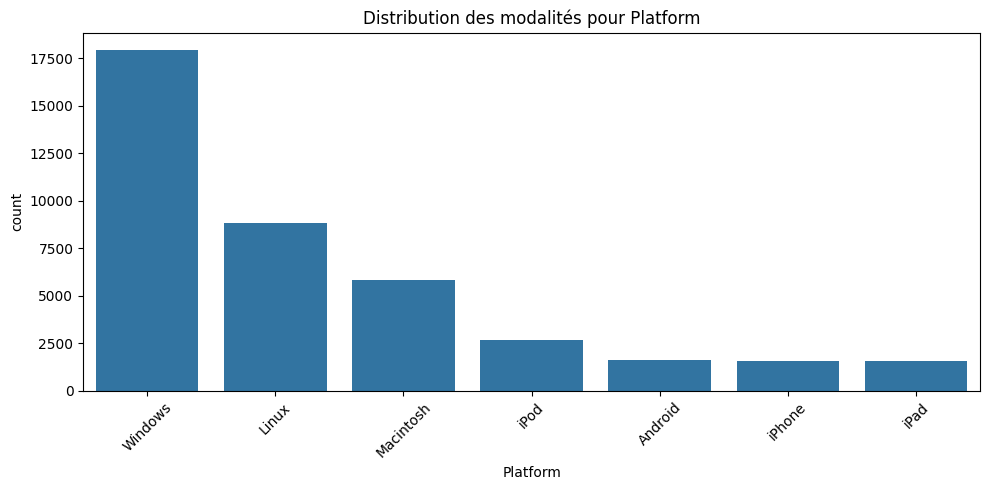


--------------------------------------------------
Variable : Browser
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64


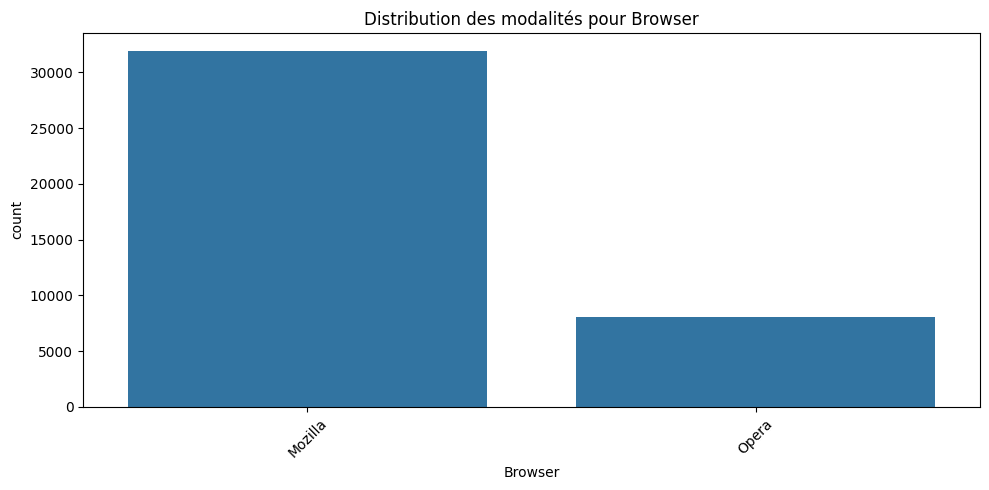


--------------------------------------------------
Variable : Alerts/Warnings
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Alerts/Warnings
Alert Not Triggered    20067
Alert Triggered        19933
Name: count, dtype: int64


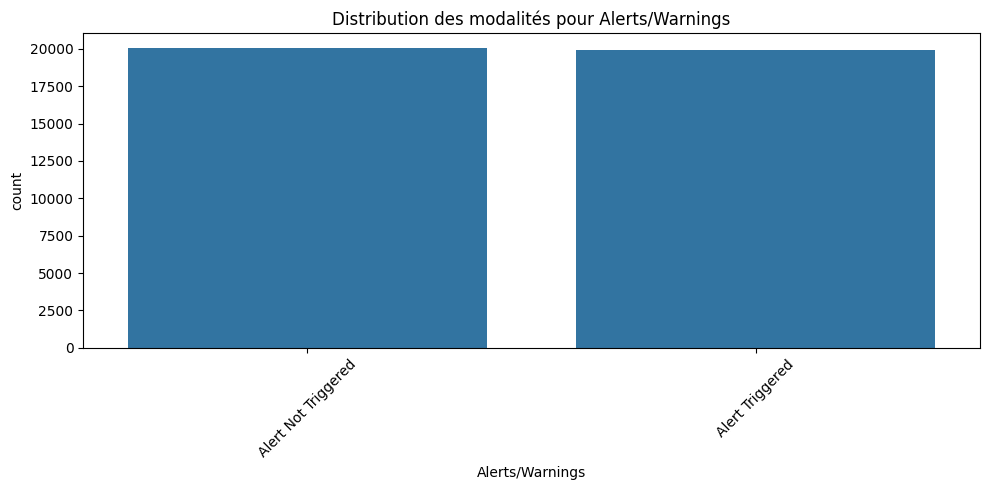


--------------------------------------------------
Variable : Attack Type
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


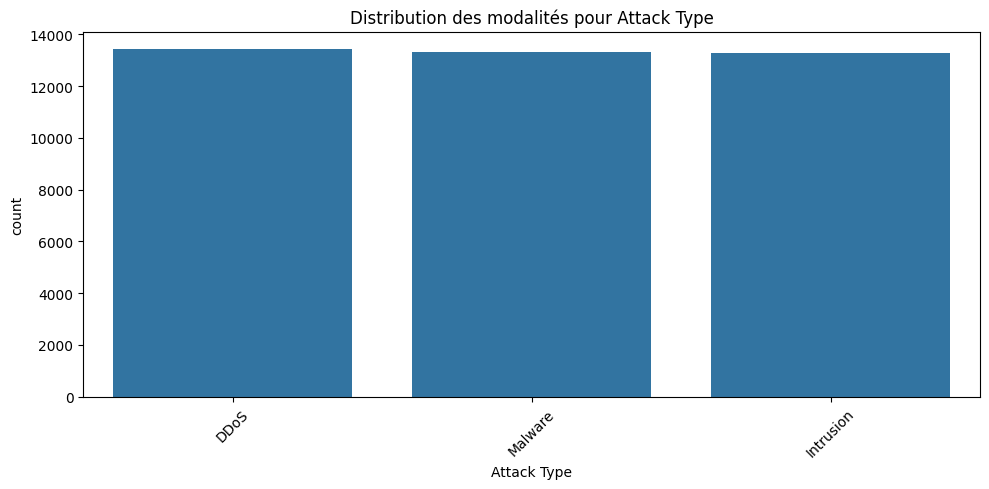


--------------------------------------------------
Variable : Attack Signature
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Attack Signature
Known Pattern A    20076
Known Pattern B    19924
Name: count, dtype: int64


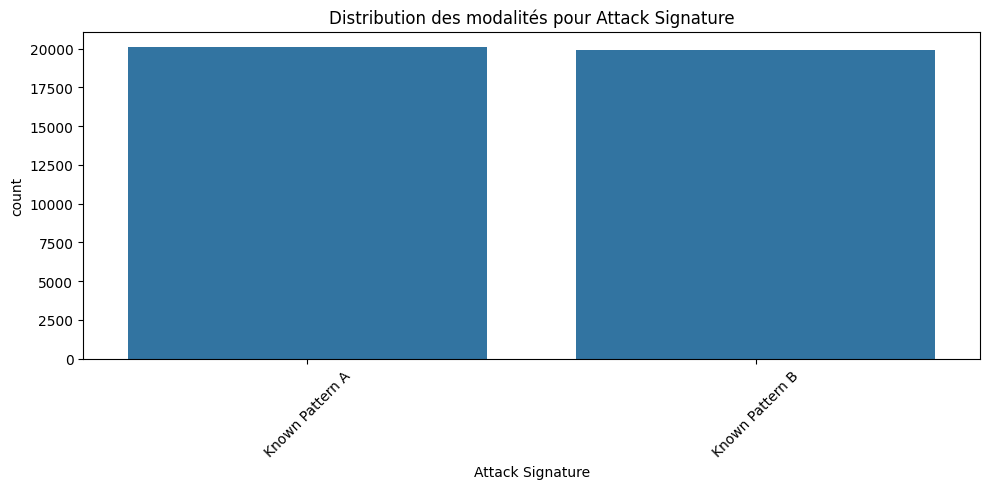


--------------------------------------------------
Variable : Action Taken
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64


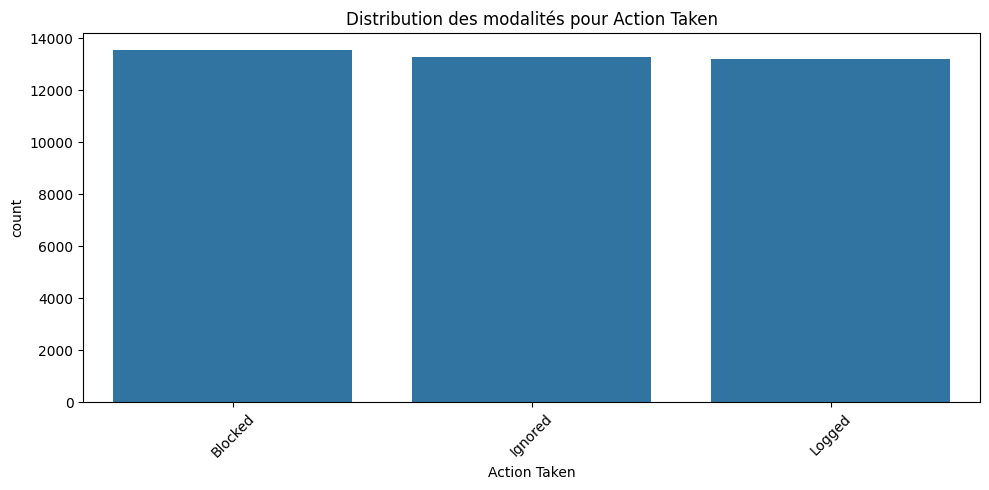


--------------------------------------------------
Variable : Severity Level
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64


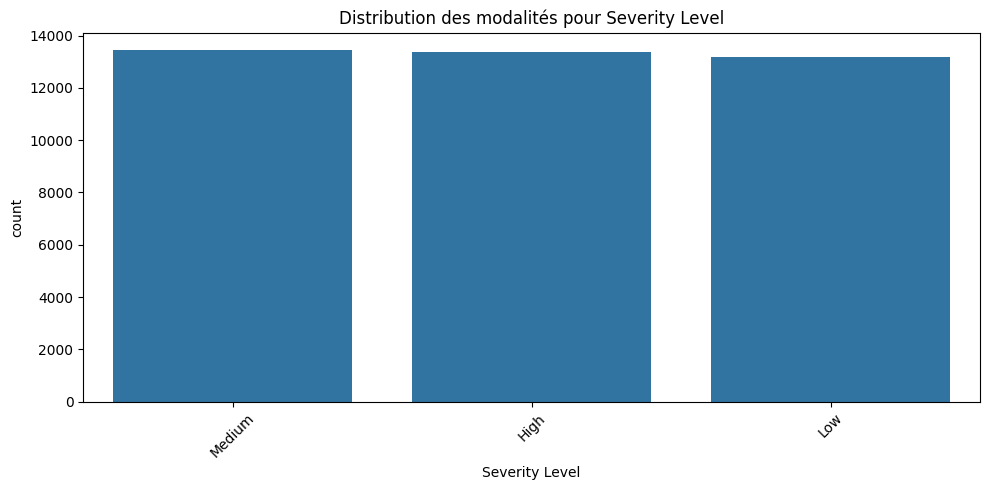


--------------------------------------------------
Variable : Network Segment
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64


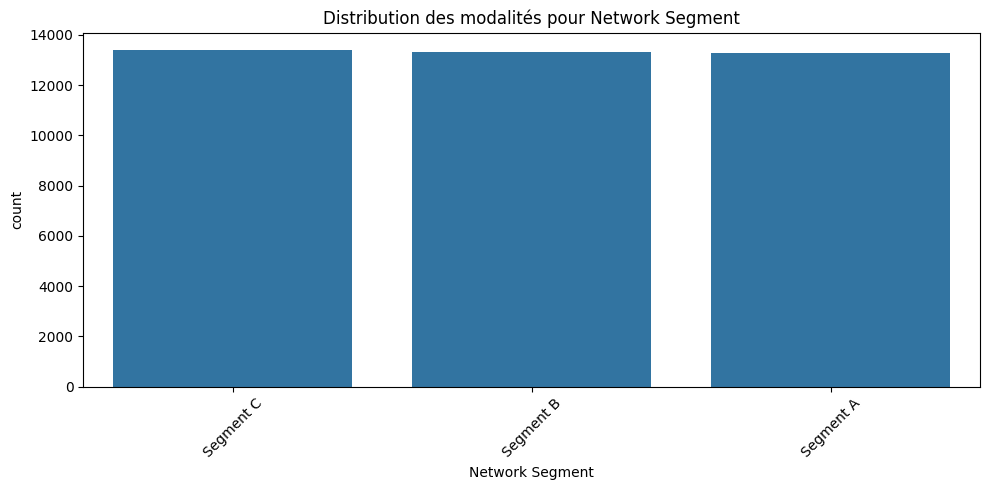


--------------------------------------------------
Variable : Firewall Logs
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Firewall Logs
Log Data    20039
No Data     19961
Name: count, dtype: int64


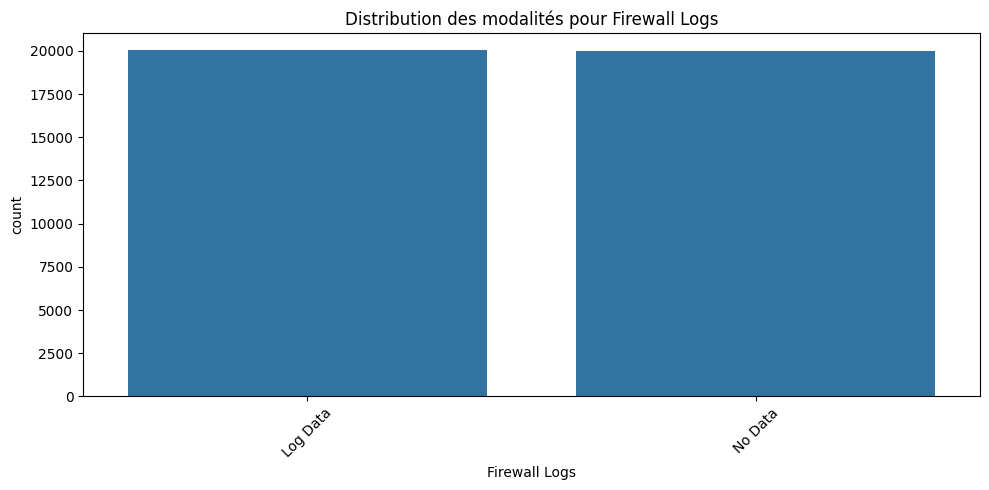


--------------------------------------------------
Variable : IDS/IPS Alerts
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
IDS/IPS Alerts
No Data       20050
Alert Data    19950
Name: count, dtype: int64


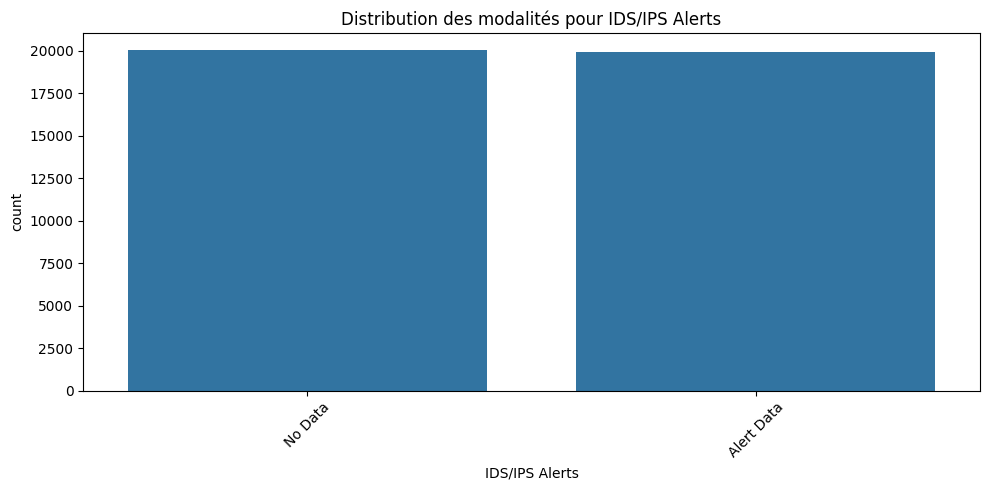


--------------------------------------------------
Variable : Log Source
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64


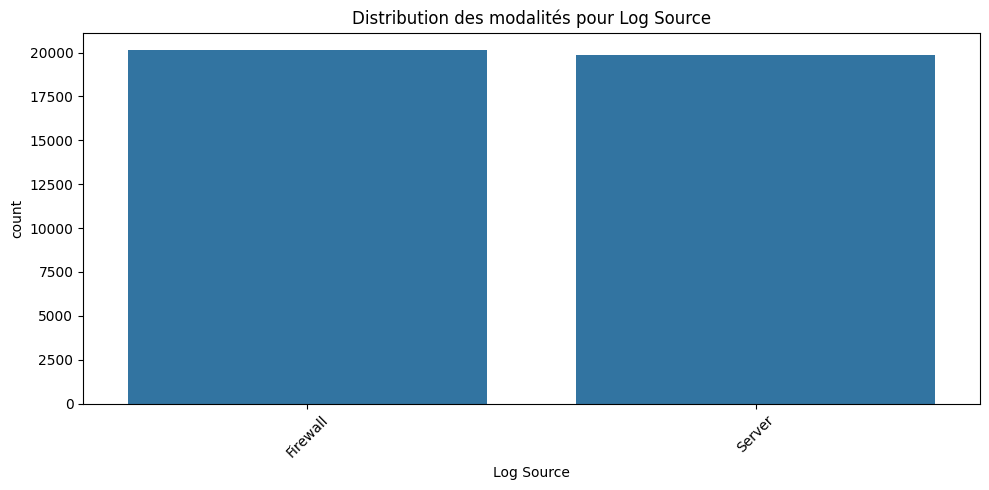

In [130]:


# Liste des variables catégorielles
variables_categorielles = [
      'Protocol',
    'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators','Platform','Browser',
    'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
    'Severity Level', 'Device Information',
    'Network Segment',  
    'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'
]


for var in variables_categorielles:
    if var in cleaned_data.columns:
        print(f"\n{'-'*50}\nVariable : {var}")
        
        
        non_null_count = cleaned_data[var].notnull().sum()
        print(f"Nombre de valeurs non nulles : {non_null_count}")
        
       
        unique_values = cleaned_data[var].nunique(dropna=True)
        print(f"Nombre de modalités uniques : {unique_values}")
        
        
        top_modalities = cleaned_data[var].value_counts(dropna=True).head(10)
        print("Top 10 des modalités les plus fréquentes :")
        print(top_modalities)
        
        # Visualisation : diagramme en barres des modalités les plus fréquentes
        plt.figure(figsize=(10, 5))
        sns.countplot(data=cleaned_data, x=var, order=top_modalities.index)
        plt.title(f"Distribution des modalités pour {var}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


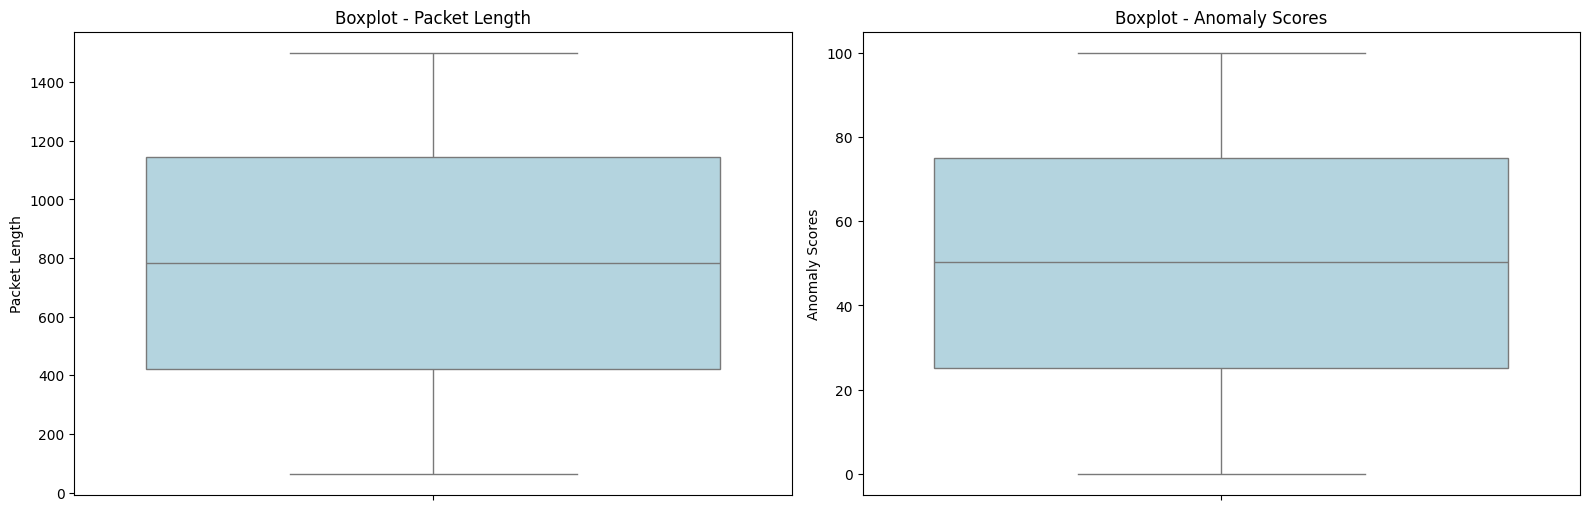

In [131]:


# Liste des variables numériques à visualiser
num_vars = [ 'Packet Length', 'Anomaly Scores']

# Configuration de l'affichage
plt.figure(figsize=(16, 10))
for i, var in enumerate(num_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=cleaned_data, y=var, color='lightblue')
    plt.title(f'Boxplot - {var}')
    plt.tight_layout()
plt.show()


1. Packet Length
 - Plage des valeurs : environ 0 à 1500 octets.

 - Médiane autour de 800, indiquant une distribution légèrement asymétrique à gauche.

 - Grande variabilité dans les longueurs de paquets (large IQR).

 - Aucun outlier visible selon la définition statistique (IQR).

==> Interprétation :

- La taille des paquets varie fortement.

- Peut refléter différents types de trafic (HTTP, FTP, attaques, etc.).

- Un croisement avec la variable Attack Type serait pertinent.

2. Anomaly Scores
- Plage des scores : 0 à 100 (peut-être normalisée ou bornée).

- Médiane autour de 50, distribution plutôt symétrique.

- La dispersion est importante, mais pas d’outliers visibles.

 ==>Interprétation :

- Les scores couvrent uniformément l’intervalle sans extrêmes anormaux détectés par IQR.

## Multivariate Descriptive Analysis

###  Pertinence de l'Analyse en Composantes Principales (ACP)

Avant de mettre en œuvre une ACP sur notre dataset, il est important d’évaluer la pertinence de cette méthode dans notre contexte spécifique :

-  **Objectif de l'ACP** : L'Analyse en Composantes Principales (ACP) est utilisée pour réduire la dimensionnalité des données tout en conservant un maximum d'information.<br> Elle permet de visualiser des relations entre variables numériques et de détecter des structures cachées.

-  **Limitation du dataset** : La majorité des variables présentes dans notre jeu de données sont de type **catégoriel ou textuel** (ex. `Attack Type`, `Severity Level`, `Protocol`, etc.), ce qui limite l’intérêt d’une ACP simple.

-  **Peu de variables numériques** : Seules quelques colonnes comme `Packet Length`, `Anomaly Scores`, `Source Port` et `Destination Port` sont numériques. Cela restreint fortement la capacité de l’ACP à extraire des dimensions significatives.

-  **Informations techniques peu discriminantes** : Les variables numériques disponibles sont surtout techniques et n’offrent pas, à elles seules, de vision claire sur la nature ou la sévérité des attaques.

-  **Besoin d’un encodage préalable** : Pour intégrer les variables catégorielles à l’analyse factorielle, un encodage (ex : One-Hot Encoding) est nécessaire. Alternativement, une **Analyse des Correspondances Multiples (ACM)** serait plus adaptée pour ce type de données.


-  **Conclusion** : Une ACP simple appliquée uniquement aux variables numériques n’est **pas suffisante pour extraire des insights métier pertinents**.<br> Une approche hybride ou enrichie est préférable pour obtenir des résultats exploitables dans un contexte professionnel.


## Data Visualization

In [132]:
# Checking the Day Column plotting with plotly
import plotly.express as px
plt = px.histogram(cleaned_data, x = 'Day', color = 'Malware Indicators', title = 'Number of Malware Attacks by Day')
plt.show()

In [133]:
# Protocol vs Severity Level - Shows which protocols present the highest security risks
fig = px.histogram(cleaned_data, x='Protocol', color='Severity Level', 
                   title='Distribution of Protocols by Severity Level', barmode='group')
fig.show()

In [134]:
# Network segment vulnerability - Identifies most vulnerable network segments
network_counts = cleaned_data['Network Segment'].value_counts().reset_index()
network_counts.columns = ['Segment', 'Count']  # Rename columns for clarity

fig = px.bar(
    network_counts,
    x='Segment',  # Using our renamed column
    y='Count',    # Using our renamed column
    title='Attack Frequency by Network Segment',
    color='Segment'  # Add color to distinguish segments better
)
fig.show()

In [135]:
# Network segment vulnerability - Identifies most vulnerable network segments
network_counts = cleaned_data['Network Segment'].value_counts().reset_index()
network_counts.columns = ['Segment', 'Count']  # Rename columns for clarity

fig = px.bar(
    network_counts,
    x='Segment',  # Using our renamed column
    y='Count',    # Using our renamed column
    title='Attack Frequency by Network Segment',
    color='Segment'  # Add color to distinguish segments better
)
fig.show()

In [136]:
# Platform distribution - Shows which platforms are most targeted
# Answers: How are attacks distributed across different platforms?
platform_counts = cleaned_data['Platform'].value_counts().reset_index()
platform_counts.columns = ['Platform', 'Count']
fig = px.pie(platform_counts, values='Count', names='Platform', 
             title='Distribution of Attacks by Platform')
fig.show()

In [137]:
# Browser analysis - Identifies most commonly targeted browsers
# Answers: Which browsers appear most frequently in attack data?
browser_counts = cleaned_data['Browser'].value_counts().reset_index()
browser_counts.columns = ['Browser', 'Count']
fig = px.bar(browser_counts.head(10), x='Browser', y='Count',
             title='Top 10 Browsers in Attack Data')
fig.show()

In [139]:
# Traffic type analysis - Shows which network traffic types are most exploited
# Answers: How do different traffic types contribute to cybersecurity incidents?
fig = px.histogram(cleaned_data, x='Traffic Type', color='Malware Indicators',
                  title='Distribution of Traffic Types with Malware Indicators',
                  barmode='group')
fig.show()

In [140]:
# Detection effectiveness - Shows proportion of detected vs undetected attacks
# Answers: What's the proportion of attacks detected or missed by security systems?
detection_status = cleaned_data['IDS/IPS Alerts'].apply(
    lambda x: 'Detected' if x != 'No Data' else 'Undetected')
detection_counts = detection_status.value_counts().reset_index()
detection_counts.columns = ['Status', 'Count']
fig = px.pie(detection_counts, values='Count', names='Status',
             title='Proportion of Detected vs. Undetected Attacks')
fig.show()

In [141]:
# Actions taken analysis - Evaluates security response effectiveness
# Answers: What types of security measures were taken and how effective were they?
action_counts = cleaned_data.groupby(['Action Taken', 'Severity Level']).size().reset_index(name='Count')
fig = px.sunburst(action_counts, path=['Action Taken', 'Severity Level'], values='Count',
                 title='Security Actions Taken by Severity Level')
fig.show()

In [142]:
# First, extract the access level from User Information column
# Assuming User Information contains access level info in a consistent format
cleaned_data['User Access Level'] = cleaned_data['User Information'].str.extract(r'(\w+) access', flags=re.I)

# Now you can run the visualization
# User privilege analysis - Shows how access levels relate to attacks
# Answers: How do user privileges affect attack patterns?
fig = px.histogram(cleaned_data, x='User Access Level', color='Severity Level',
                  title='Attack Severity by User Access Level',
                  barmode='group')
fig.show()

In [145]:
# Time of day analysis - Identifies peak attack hours
# Answers: When do most attacks occur during the day?
hour_counts = cleaned_data.groupby('Hour').size().reset_index(name='Count')
fig = px.line(hour_counts, x='Hour', y='Count', 
              title='Attack Frequency by Hour of Day', 
              markers=True)
fig.show()

In [146]:
# Attack type analysis - Shows distribution of different attack types
# Answers: What types of attacks are most common?
attack_counts = cleaned_data['Attack Type'].value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Count']
fig = px.bar(attack_counts.head(10), x='Attack Type', y='Count',
             title='Top 10 Attack Types')
fig.show()

In [147]:
# Packet type analysis - Examines relationship between packet types and malware
# Answers: Which packet types are most associated with malware?
fig = px.histogram(cleaned_data, x='Packet Type', color='Malware Indicators',
                  title='Distribution of Packet Types with Malware Indicators',
                  barmode='group')
fig.show()

In [148]:
# Severity distribution over time - Tracks changes in attack severity over time
# Answers: Is attack severity increasing or decreasing over time?
severity_time = cleaned_data.groupby(['Month', 'Severity Level']).size().reset_index(name='Count')
fig = px.line(severity_time, x='Month', y='Count', color='Severity Level',
             title='Attack Severity Trends by Month',
             markers=True)
fig.show()

In [149]:
# Traffic vs Protocol analysis - Shows relationship between traffic types and protocols
# Answers: Which protocols are used for different traffic types?
fig = px.density_heatmap(cleaned_data, x='Protocol', y='Traffic Type',
                        title='Relationship Between Protocols and Traffic Types')
fig.show()

In [152]:
# Combined severity and traffic type analysis
# Answers: Which traffic types have the most severe security incidents?
severity_traffic = cleaned_data.groupby(['Traffic Type', 'Severity Level']).size().reset_index(name='Count')
fig = px.sunburst(severity_traffic, path=['Traffic Type', 'Severity Level'], values='Count',
                 title='Traffic Types by Severity Level')
fig.show()

In [155]:
# Attack success analysis - Determine which attacks were successful despite actions taken
# First, create a column to classify if attack was successful despite actions
cleaned_data['Attack Success'] = (cleaned_data['Severity Level'] == 'High') | (cleaned_data['Severity Level'] == 'Critical')
success_by_action = cleaned_data.groupby(['Action Taken', 'Attack Success']).size().reset_index(name='Count')
fig = px.bar(success_by_action, x='Action Taken', y='Count', color='Attack Success',
            title='Attack Success by Action Taken',
            barmode='group')
fig.show()

In [157]:
# Creating a Sankey diagram to visualize attack flow
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Prepare data for Sankey diagram
attack_flow = cleaned_data.groupby(['Attack Type', 'Network Segment', 'Severity Level', 'Action Taken']).size().reset_index(name='Count')

# Get top 5 attack types for readability
top_attacks = cleaned_data['Attack Type'].value_counts().nlargest(5).index.tolist()
attack_flow = attack_flow[attack_flow['Attack Type'].isin(top_attacks)]

# Create source-target pairs and values
source = []
target = []
values = []
labels = []

# Add Attack Types as first nodes
attack_types = attack_flow['Attack Type'].unique().tolist()
attack_type_dict = {attack: i for i, attack in enumerate(attack_types)}
labels.extend(attack_types)

# Add Network Segments as second nodes
segments = attack_flow['Network Segment'].unique().tolist()
segment_dict = {segment: i+len(attack_types) for i, segment in enumerate(segments)}
labels.extend(segments)

# Add Severity Levels as third nodes
severity_levels = attack_flow['Severity Level'].unique().tolist()
severity_dict = {level: i+len(attack_types)+len(segments) for i, level in enumerate(severity_levels)}
labels.extend(severity_levels)

# Add Actions Taken as fourth nodes
actions = attack_flow['Action Taken'].unique().tolist()
action_dict = {action: i+len(attack_types)+len(segments)+len(severity_levels) for i, action in enumerate(actions)}
labels.extend(actions)

# Connect Attack Types to Network Segments
for _, row in attack_flow.iterrows():
    # Attack Type to Network Segment
    source.append(attack_type_dict[row['Attack Type']])
    target.append(segment_dict[row['Network Segment']])
    values.append(row['Count'])
    
    # Network Segment to Severity Level
    source.append(segment_dict[row['Network Segment']])
    target.append(severity_dict[row['Severity Level']])
    values.append(row['Count'])
    
    # Severity Level to Action Taken
    source.append(severity_dict[row['Severity Level']])
    target.append(action_dict[row['Action Taken']])
    values.append(row['Count'])

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = "blue"
    ),
    link = dict(
        source = source,
        target = target,
        value = values
    ))])

fig.update_layout(
    title_text="Attack Flow Analysis: Type → Network Segment → Severity → Action",
    font=dict(size=12),
    height=800
)

fig.show()

In [160]:
# 3D Network Attack Analysis Visualization
# Answers: How do attacks vary across time, severity, and network characteristics?
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Create 'DayName' column if it doesn't exist
if 'DayName' not in cleaned_data.columns:
    day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    cleaned_data['DayName'] = cleaned_data['DayOfWeek'].map(day_map)

# Prepare data for 3D visualization
# Sample 5000 points for better performance
if len(cleaned_data) > 5000:
    sample_data = cleaned_data.sample(5000, random_state=42)
else:
    sample_data = cleaned_data

# Encode categorical variables numerically for visualization
protocol_map = {p: i for i, p in enumerate(sample_data['Protocol'].unique())}
severity_map = {'Low': 0, 'Medium': 1, 'High': 2, 'Critical': 3}
network_map = {n: i for i, n in enumerate(sample_data['Network Segment'].unique())}

# Create numeric representations
protocol_num = sample_data['Protocol'].map(protocol_map)
severity_num = sample_data['Severity Level'].map(severity_map)
network_num = sample_data['Network Segment'].map(network_map)

# Set up marker sizes based on packet length
marker_size = sample_data['Packet Length'] / sample_data['Packet Length'].max() * 15 + 5

# Create hover text with detailed information
hover_text = []
for idx, row in sample_data.iterrows():
    hover_text.append(
        f"Attack Type: {row['Attack Type']}<br>" +
        f"Protocol: {row['Protocol']}<br>" +
        f"Severity: {row['Severity Level']}<br>" +
        f"Network: {row['Network Segment']}<br>" +
        f"Hour: {row['Hour']}<br>" +
        f"Day: {row['DayName']}<br>" +
        f"Packet Length: {row['Packet Length']}<br>" +
        f"Action: {row['Action Taken']}"
    )

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=protocol_num,
    y=severity_num,
    z=sample_data['Hour'],
    text=hover_text,
    hoverinfo='text',
    mode='markers',
    marker=dict(
        size=marker_size,
        color=network_num,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(
            title="Network Segment",
            tickvals=list(network_map.values()),
            ticktext=list(network_map.keys())
        )
    )
)])

# Update layout with comprehensive labels
fig.update_layout(
    title='3D Cybersecurity Attack Analysis',
    scene=dict(
        xaxis=dict(
            title='Protocol Type',
            tickvals=list(protocol_map.values()),
            ticktext=list(protocol_map.keys()),
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 250)'
        ),
        yaxis=dict(
            title='Severity Level',
            tickvals=[0, 1, 2, 3],
            ticktext=['Low', 'Medium', 'High', 'Critical'],
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 250)'
        ),
        zaxis=dict(
            title='Hour of Day',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 250)'
        ),
    ),
    height=800,
    width=1000
)

fig.show()

# Add explanatory text
print("3D Attack Pattern Analysis:")
print("----------------------------")
print("This visualization reveals multi-dimensional relationships between:")
print("- Protocol types (x-axis)")
print("- Attack severity (y-axis)")
print("- Time of day (z-axis)")
print("- Network segment (color)")
print("- Packet size (marker size)")
print("\nKey insights to look for:")
print("1. Clusters indicate common attack patterns")
print("2. Outliers may represent unusual or targeted attacks")
print("3. Color patterns show which network segments are vulnerable at specific times")
print("4. Large markers highlight attacks with significant data transfer")

3D Attack Pattern Analysis:
----------------------------
This visualization reveals multi-dimensional relationships between:
- Protocol types (x-axis)
- Attack severity (y-axis)
- Time of day (z-axis)
- Network segment (color)
- Packet size (marker size)

Key insights to look for:
1. Clusters indicate common attack patterns
2. Outliers may represent unusual or targeted attacks
3. Color patterns show which network segments are vulnerable at specific times
4. Large markers highlight attacks with significant data transfer
